In [2]:
import csv
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import pandas as pd
from matplotlib import style
style.use('ggplot')
from struct import unpack

In [3]:
with open('/Users/torstensola/Fundrive/hpm/hpm_201903101138.csv') as csvfile:
    readCSV = csv.reader(csvfile,delimiter=',')
    data = []
    datum = []
    for row in readCSV:
        if len(row) > 0:
            if row[0] == '':
                datum.append(''.join(row[1:]))
            else:
                datum = row
            data.append(datum)

In [4]:
myData = {
    'Trial': [],
    'Session': [],
    'Sniff': [],
    'Position': [],
    'Reward trigger': [],
    'Reward onset': [],
    'Reward offset': [],
    'Licks': [],
}

In [5]:
session = 1
for datum in data:
    t = [float(x) for x in datum[1:]]
#    t.append(session)
    if datum[0] == 'x':
        myData['Sniff'].append(t)
    elif datum[0] == 'M':
        myData['Position'].append(t)
    elif datum[0] == 'R':
        myData['Reward trigger'].append(t)
    elif datum[0] == 'r':
        myData['Reward onset'].append(t)
    elif datum[0] == 'p':
        myData['Reward offset'].append(t)
    elif datum[0] == 'l':
        myData['Licks'].append(t)
    elif datum[0] == 'T':
        myData['Trial'].append(t)

In [6]:
time = []
pos = []
for rows in myData['Position']:
    pos.append(float(rows[0]))
    time.append(float(rows[1]))

In [7]:
t = [float(x) for x in datum[1:]]

In [245]:
t.append(session)

In [337]:
df = pd.DataFrame(data)

In [ ]:
myData['Licks']

In [133]:
# Get all lick onsets
lick_dir = [float(x[1]) for x in myData['Licks'] if x[0] is '1']

In [326]:
myData['Date'] = datetime.strptime(data[1][0][10:], '%Y%m%d%H%M')

In [9]:
md = pd.DataFrame({
    'Trial': {'Value': [], 'TS_PC': []},
    'Sniff': {'TS_A': [], 'TS_PC': []},
    'Position': {'Value':[], 'TS_PC': []},
    'Reward': {'trigTS_PC': [], 'TS_A': [], 'TS_PC': [], 'offTS_A': [], 'offTS_PC': []},
    'Licks': {'Value': [], 'TS_A': [], 'TS_PC': []},
})

In [10]:
session = 1
for datum in data:
    t = [float(x) for x in datum[1:]]
    if datum[0] == 'x':
        md.Sniff.TS_A.append(t[0])
        md.Sniff.TS_PC.append(t[1])
    elif datum[0] == 'M':
        md.Position.Value.append(-t[0])
        md.Position.TS_PC.append(t[1])
    elif datum[0] == 'R':
        md.Reward.trigTS_PC.append(t)
    elif datum[0] == 'r':
        md.Reward.TS_A.append(t[0])
        md.Reward.TS_PC.append(t[1])
    elif datum[0] == 'p':
        md.Reward.offTS_A.append(t[0])
        md.Reward.offTS_PC.append(t[1])
    elif datum[0] == 'l':
        md.Licks.Value.append(t[0])
        md.Licks.TS_A.append(t[1])
        md.Licks.TS_PC.append(t[2])
    elif datum[0] == 'T':
        md.Trial.Value.append(t[0])
        md.Trial.TS_PC.append(t[1])

In [11]:
md.Licks['posIDX'] = []
old = 100
n = 0
for hm in md.Licks.TS_PC:
    keepatit = 1
    while keepatit:
        if hm-md.Position.TS_PC[n] < 0:
            keepatit = 0
            md.Licks.posIDX.append(n)
        else:
            n += 1

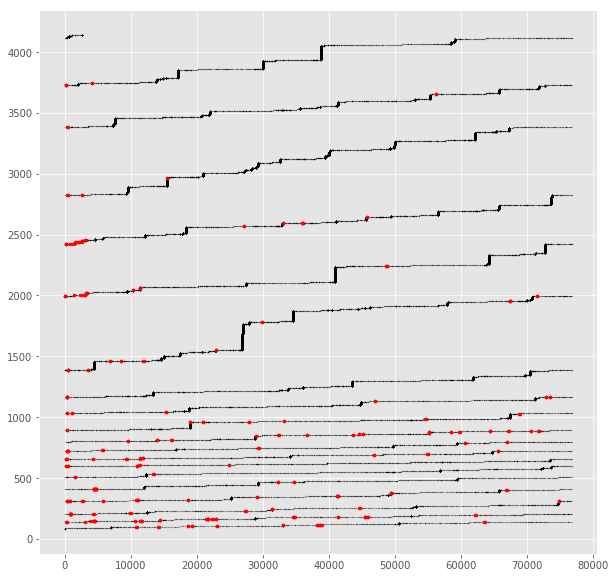

In [12]:
plt.figure(figsize=[10,10])
plt.plot(md.Position.Value,md.Position.TS_PC,'.k',markersize = .2)
for hm in md.Licks.posIDX:
    plt.plot(md.Position.Value[hm],md.Position.TS_PC[hm],'.r',markersize = 5)

In [655]:
def read_t(SpikesDataFileName,insec=True):
    '''Reads data from an MClust .t file.
       These files contain events/spikes data.
       Based on MClust-3.4/Matlab/SpecificUtils/ReadHeader.m
       If 'insec' is True, timestamps are given in seconds (float)
       otherwise they are given as tenths of msec (int32)
    '''
    fid = open(SpikesDataFileName,'rb')
    (DataPosition,HeaderText) = read_t_header(fid)
    fid.seek(DataPosition)
    ByteString = fid.read()
    Nsamples = len(ByteString)/4
    timestamps = np.empty(Nsamples,dtype=np.uint32)
    for inds in range(Nsamples):
        timestamps[inds] = unpack('>I', ByteString[4*inds:4*inds+4])[0]
    #timestamps = np.fromfile(fid,dtype='uint32')
    fid.close()
    if insec:
        timestamps = 1e-4*timestamps        # From 100usec to sec (see NSpike/MClust docs)
    return timestamps


In [923]:
fid = open('/Users/StensolaTor/Fundrive/Spike times hpm vr 09032019/TT0_14._t64','rb')

In [936]:
fid = open('/Users/StensolaTor/Fundrive/Spike times hpm vr 09032019/TT0_14._t64','rb')
doit = 1
saveflag = 0
spks = []
while doit:
    t = fid.readline()
    if t == b'':
        saveflag = 0
        break
    elif saveflag:    
        spks.append(t)
    elif t == b'%%ENDHEADER\n':
        saveflag = 1

b''


In [941]:
spkss=[]
for i in range(len(spks)):
    spkss.append(spks[i][:-1])

In [915]:
Timestamps = []
for inds in tet:
    for inds2 in range(int(len(inds)/4)):
        Timestamps.append(unpack('>I2', inds[4*inds2:4*inds2+4])[0])

In [1004]:

Nsamples = int(len(spks)/4)
timestamps = np.empty(Nsamples,dtype=np.uint32)
for inds in range(Nsamples):
    timestamps[inds] = unpack('>I2', spks[4*inds:4*inds+4])[0]
fid.close()

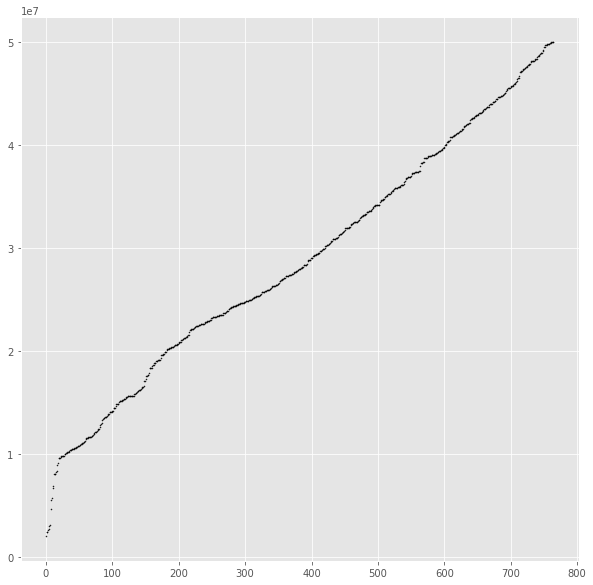

In [1008]:
plt.figure(figsize=[10,10])
plt.plot(timestamps[1::2],'.k',markersize = 1)

In [997]:
fid = open('/Users/StensolaTor/Fundrive/Spike times hpm vr 09032019/TT5_09.t64','rb')
saveflag = 0
spks = []
while True:
    t = fid.readline()
    if t == b'%%ENDHEADER\n':
        saveflag = 1
        b = fid.tell()
        fid.seek(b)
        spks = fid.read()
        break

In [1234]:
fid = open('/Users/StensolaTor/Fundrive/Spike times hpm vr 09032019/100_AUX3.continuous','rb')

In [ ]:
fid.readline()

In [1247]:
b = fid.tell()

In [1248]:
fid.seek(b)
test = fid.read()

In [1249]:
len(test)

293580836

In [1250]:
Nsamples = int(len(test)/4)
ttimestamps = np.empty(Nsamples,dtype=np.uint32)
for inds in range(Nsamples):
    ttimestamps[inds] = unpack('>I', test[4*inds:4*inds+4])[0]

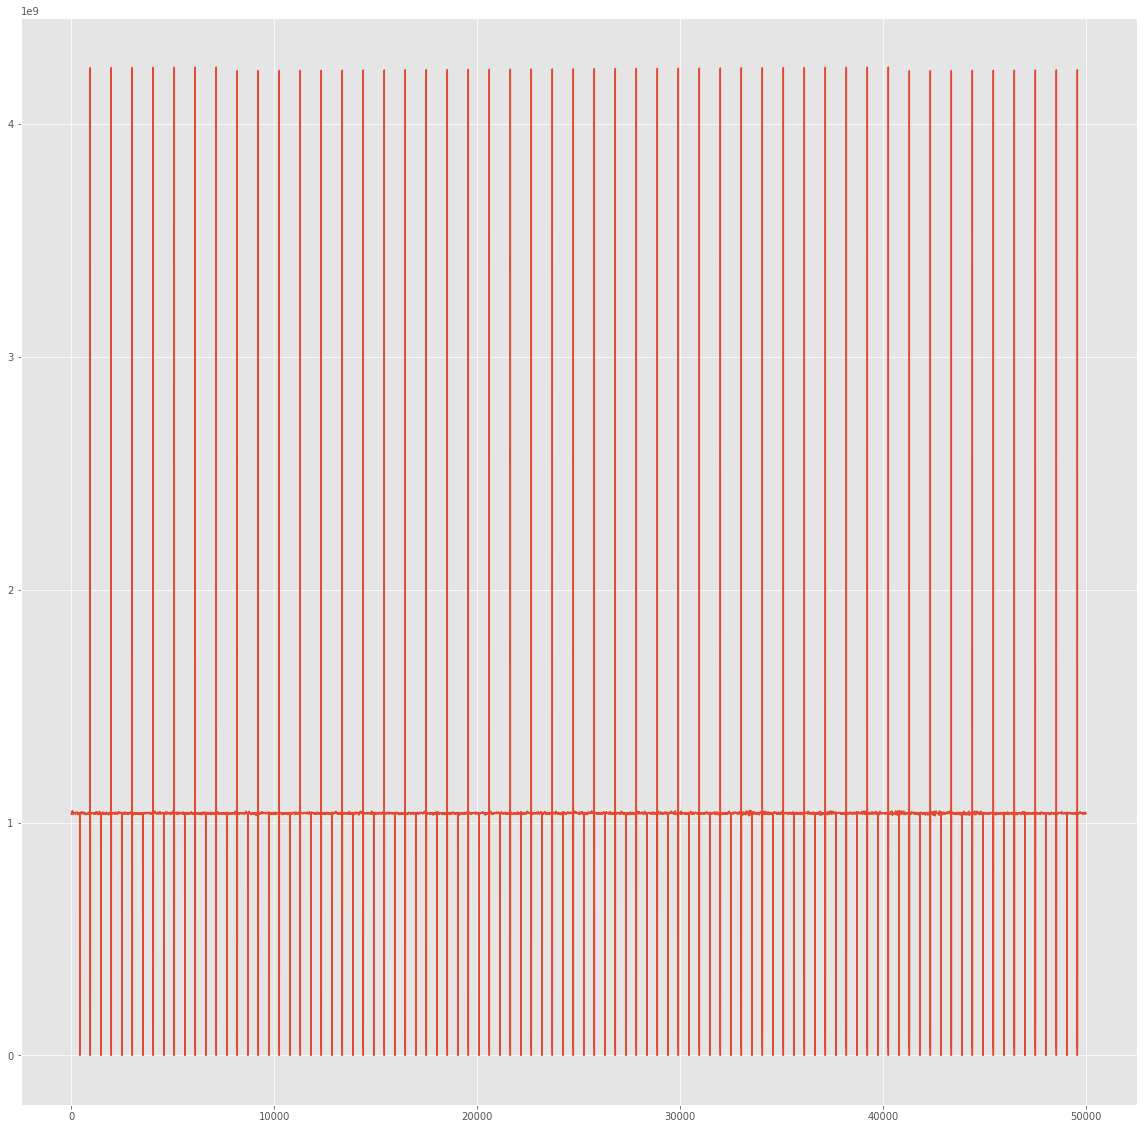

In [1251]:
plt.figure(figsize=[20,20])
plt.plot(ttimestamps[40000000:40050000])

In [15]:
def loadEvents(filepath):

    data = { }
    
    print ('loading events...')
    
    f = open(filepath,'rb')
    header = readHeader(f)
    
    if float(header['version']) < 0.4:
        raise Exception('Loader is only compatible with .events files with version 0.4 or higher')
     
    data['header'] = header 
    
    index = -1

    channel = np.zeros(MAX_NUMBER_OF_EVENTS)
    timestamps = np.zeros(MAX_NUMBER_OF_EVENTS)
    sampleNum = np.zeros(MAX_NUMBER_OF_EVENTS)
    nodeId = np.zeros(MAX_NUMBER_OF_EVENTS)
    eventType = np.zeros(MAX_NUMBER_OF_EVENTS)
    eventId = np.zeros(MAX_NUMBER_OF_EVENTS)
    recordingNumber = np.zeros(MAX_NUMBER_OF_EVENTS)

    while f.tell() < os.fstat(f.fileno()).st_size:
        
        index += 1
        
        timestamps[index] = np.fromfile(f, np.dtype('<i8'), 1)
        sampleNum[index] = np.fromfile(f, np.dtype('<i2'), 1)
        eventType[index] = np.fromfile(f, np.dtype('<u1'), 1)
        nodeId[index] = np.fromfile(f, np.dtype('<u1'), 1)
        eventId[index] = np.fromfile(f, np.dtype('<u1'), 1)
        channel[index] = np.fromfile(f, np.dtype('<u1'), 1)
        recordingNumber[index] = np.fromfile(f, np.dtype('<u2'), 1)
        
    data['channel'] = channel[:index]
    data['timestamps'] = timestamps[:index]
    data['eventType'] = eventType[:index]
    data['nodeId'] = nodeId[:index]
    data['eventId'] = eventId[:index]
    data['recordingNumber'] = recordingNumber[:index]
    data['sampleNum'] = sampleNum[:index]
    
    return data
    
def readHeader(f):
    """Read header information from the first 1024 bytes of an OpenEphys file.
    
    Args:
        f: An open file handle to an OpenEphys file
    
    Returns: dict with the following keys.
        - bitVolts : float, scaling factor, microvolts per bit
        - blockLength : int, e.g. 1024, length of each record (see 
            loadContinuous)
        - bufferSize : int, e.g. 1024
        - channel : the channel, eg "'CH1'"
        - channelType : eg "'Continuous'"
        - date_created : eg "'15-Jun-2016 21212'" (What are these numbers?)
        - description : description of the file format
        - format : "'Open Ephys Data Format'"
        - header_bytes : int, e.g. 1024
        - sampleRate : float, e.g. 30000.
        - version: eg '0.4'
        Note that every value is a string, even numeric data like bitVolts.
        Some strings have extra, redundant single apostrophes.
    """
    header = {}
    
    # Read the data as a string
    # Remove newlines and redundant "header." prefixes
    # The result should be a series of "key = value" strings, separated
    # by semicolons.
    header_string = f.read(1024).replace('\n','').replace('header.','')
    
    # Parse each key = value string separately
    for pair in header_string.split(';'):
        if '=' in pair:
            key, value = pair.split(' = ')
            key = key.strip()
            value = value.strip()
            
            # Convert some values to numeric
            if key in ['bitVolts', 'sampleRate']:
                header[key] = float(value)
            elif key in ['blockLength', 'bufferSize', 'header_bytes']:
                header[key] = int(value)
            else:
                # Keep as string
                header[key] = value

    return header

In [16]:
data = loadEvents('/Users/torstensola/Fundrive/Spike times hpm vr 09032019/all_channels.events')

loading events...


TypeError: a bytes-like object is required, not 'str'

In [137]:
f = open('/Users/torstensola/Fundrive/Spike times hpm vr 09032019/all_channels.events','rb')

In [157]:
f.readline()

b'*\xa8\x00\x00\x00\x00\x00\x00\x00\x03d\x00\x00\x01\x00=+\xa8\x00\x00\x00\x00\x00\x00\x00\x03d\x01\x00\x01\x00p,\xa8\x00\x00\x00\x00\x00\x00\x00\x03d\x00\x00\x01\x00\x84-\xa8\x00\x00\x00\x00\x00\x00\x00\x03d\x01\x00\x01\x00\xb7.\xa8\x00\x00\x00\x00\x00\x00\x00\x03d\x00\x00\x01\x00\xea/\xa8\x00\x00\x00\x00\x00\x00\x00\x03d\x01\x00\x01\x00\x1d1\xa8\x00\x00\x00\x00\x00\x00\x00\x03d\x00\x00\x01\x0012\xa8\x00\x00\x00\x00\x00\x00\x00\x03d\x01\x00\x01\x00d3\xa8\x00\x00\x00\x00\x00\x00\x00\x03d\x00\x00\x01\x00\x974\xa8\x00\x00\x00\x00\x00\x00\x00\x03d\x01\x00\x01\x00\xca5\xa8\x00\x00\x00\x00\x00\x00\x00\x03d\x00\x00\x01\x00\xde6\xa8\x00\x00\x00\x00\x00\x00\x00\x03d\x01\x00\x01\x00\x118\xa8\x00\x00\x00\x00\x00\x00\x00\x03d\x00\x00\x01\x00D9\xa8\x00\x00\x00\x00\x00\x00\x00\x03d\x01\x00\x01\x00w:\xa8\x00\x00\x00\x00\x00\x00\x00\x03d\x00\x00\x01\x00\xaa;\xa8\x00\x00\x00\x00\x00\x00\x00\x03d\x01\x00\x01\x00\xdc<\xa8\x00\x00\x00\x00\x00\x00\x00\x03d\x00\x00\x01\x00\x0f>\xa8\x00\x00\x00\x00\x00\x00\

In [158]:
import os
index = -1
MAX_NUMBER_OF_EVENTS = int(1e6)
channel = np.zeros(MAX_NUMBER_OF_EVENTS)
timestamps = np.zeros(MAX_NUMBER_OF_EVENTS)
sampleNum = np.zeros(MAX_NUMBER_OF_EVENTS)
nodeId = np.zeros(MAX_NUMBER_OF_EVENTS)
eventType = np.zeros(MAX_NUMBER_OF_EVENTS)
eventId = np.zeros(MAX_NUMBER_OF_EVENTS)
recordingNumber = np.zeros(MAX_NUMBER_OF_EVENTS)

while f.tell() < os.fstat(f.fileno()).st_size:

    index += 1

    timestamps[index] = np.fromfile(f, np.dtype('<i8'), 1)
    sampleNum[index] = np.fromfile(f, np.dtype('<i2'), 1)
    eventType[index] = np.fromfile(f, np.dtype('<u1'), 1)
    nodeId[index] = np.fromfile(f, np.dtype('<u1'), 1)
    eventId[index] = np.fromfile(f, np.dtype('<u1'), 1)
    channel[index] = np.fromfile(f, np.dtype('<u1'), 1)
    recordingNumber[index] = np.fromfile(f, np.dtype('<u2'), 1)


    

ValueError: setting an array element with a sequence.

462775


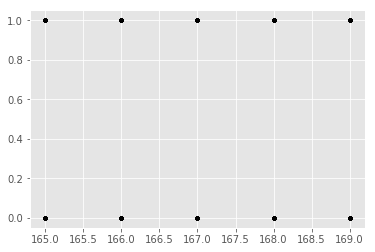

In [31]:
print(index)
plt.plot(timestamps[:1000],eventType[:1000],'.k')

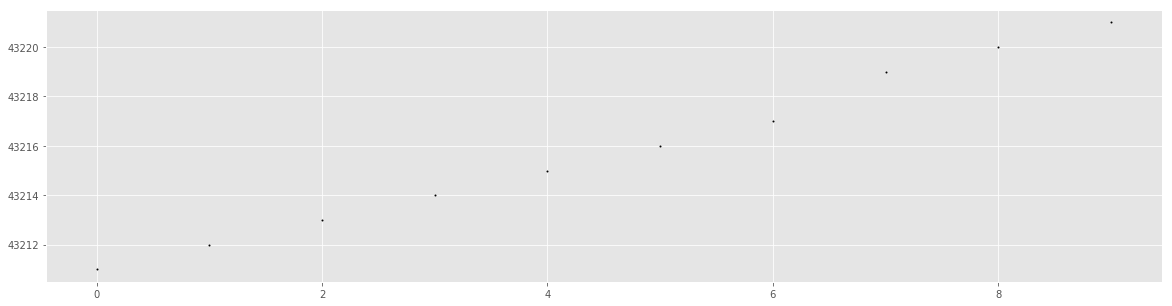

In [159]:
plt.figure(figsize=[20,5])
plt.plot(timestamps[:10],'.k',markersize = 2)

In [116]:
max(np.diff(timestamps[:index]))

1.0

In [1377]:
np.unique(channel[:index])

array([ 0.])

In [1344]:
timestamps[:400][1]

165.0

In [1372]:
sum(eventType[:index] == 1)

231387

In [1376]:
231387/5

46277.4

In [1374]:
len(md.Sniff.TS_PC)

409350

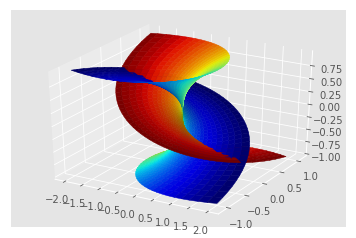

In [1381]:
# L-16 MCS 507 Wed 2 Oct 2013 : riemann_matplotlib.py

"""
This script uses pyplot of matplotlib to plot
the Riemann surface of the cubed root.
"""

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

F = plt.figure()
A = F.gca(projection='3d')
UR = np.arange(-1, 1, 0.01)
VR = np.arange(-1, 1, 0.01)
U, V = np.meshgrid(UR, VR)
X = U**3 - 3*U*V**2
Y = 2*U**2*V - V**3

# scale colors so that in [0,1]
CV = (1.0 + V)/2

S = A.plot_surface(X, Y, U, facecolors=cm.jet(CV))

plt.show()

In [1]:
import pyopenephys
import matplotlib.pylab as plt

file = pyopenephys.File("/Users/torstensola/Fundrive/2019-03-09_09-59-06 long vr") 
experiment = file.experiments[0]
recording = experiment.recordings[0]


events_data = recording.events


Loading Open-Ephys: reading settings.xml...
Decoding data from  openephys  format


ValueError: invalid literal for int() with base 10: 'pikes'

In [5]:
events_data[0].times[-1]-events_data[0].times[0]

array(55.87692973) * 1/Hz

In [28]:
min(events_data[0].times)

array(-190.05591525) * 1/Hz

In [1]:
np.mean(np.diff(md.Sniff.TS_A))

NameError: name 'np' is not defined